## SRPT vs. BASRPT

In [4]:
%load_ext autoreload
import trafpy
import trafpy.generator as tpg

import os
import pickle

path_to_benchmark_data = os.path.dirname(trafpy.__file__)+'/../data/testbed_data/ndf50_1s_university_testbed_data_v6.obj'
filehandler = open(path_to_benchmark_data, 'rb')
tb_dict = pickle.load(filehandler)

print(tb_dict.keys())

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
dict_keys(['benchmark_data', 'benchmarks', 'envs', 'config'])


In [5]:
%autoreload
# unpack env dicts into list of env objects
envs = tb_dict['envs']



-=-=-=-=-=-=--= Summary -=-=-=-=-=-=-=-

 ~* General Information *~
Simulation name: 'benchmark_university_load_0.2_repeat_0_scheduler_basrpt'
Measurement duration: 3389714.7288963506 (Start time : 423714.3411120438 | End time: 3813429.0700083943)
Total number of generated demands (jobs or flows) passed to env: 3000
Total number of these demands which arrived during measurement period: 2377
Total info arrived: 7964254.0 info unit demands arrived
Total info transported: 7964254.0 info unit demands transported
Load (abs): 2.3495351783166316 info unit demands arrived per unit time (from first to last flow arriving)
Load (frac): 0.19579459819305264 fraction of network capacity requested (from first to last flow arriving)
Throughput (abs): 2.3495351783166316 info units transported per unit time
Throughput (frac): 1.0 fraction of arrived info successfully transported

 ~* Flow Information *~
Total number of generated flows passed to env (src != dst, dependency_type == 'data_dep'): 3000
Tot



-=-=-=-=-=-=--= Summary -=-=-=-=-=-=-=-

 ~* General Information *~
Simulation name: 'benchmark_university_load_0.8_repeat_0_scheduler_srpt'
Measurement duration: 3277501.4760985365 (Start time : 409687.6845123171 | End time: 3687189.1606108537)
Total number of generated demands (jobs or flows) passed to env: 12000
Total number of these demands which arrived during measurement period: 9583
Total info arrived: 31337453.0 info unit demands arrived
Total info transported: 10555315.0 info unit demands transported
Load (abs): 9.561384862381022 info unit demands arrived per unit time (from first to last flow arriving)
Load (frac): 0.7967820718650852 fraction of network capacity requested (from first to last flow arriving)
Throughput (abs): 3.2205370697696245 info units transported per unit time
Throughput (frac): 0.3368274696734288 fraction of arrived info successfully transported

 ~* Flow Information *~
Total number of generated flows passed to env (src != dst, dependency_type == 'data_d

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o



-=-=-=-=-=-=--= Summary -=-=-=-=-=-=-=-

 ~* General Information *~
Simulation name: 'benchmark_university_load_0.6_repeat_0_scheduler_random'
Measurement duration: 4507776.682366516 (Start time : 563472.0852958146 | End time: 5071248.767662331)
Total number of generated demands (jobs or flows) passed to env: 12000
Total number of these demands which arrived during measurement period: 9654
Total info arrived: 32677579.0 info unit demands arrived
Total info transported: 9902806.0 info unit demands transported
Load (abs): 7.249156580410889 info unit demands arrived per unit time (from first to last flow arriving)
Load (frac): 0.6040963817009074 fraction of network capacity requested (from first to last flow arriving)
Throughput (abs): 2.1968271051974946 info units transported per unit time
Throughput (frac): 0.30304588966030804 fraction of arrived info successfully transported

 ~* Flow Information *~
Total number of generated flows passed to env (src != dst, dependency_type == 'data_d

/home/zciccwf/phd_project/projects/trafpy/trafpy/generator/src/dists/plot_dists.py:231: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
/home/zciccwf/phd_project/projects/trafpy/trafpy/generator/src/dists/plot_dists.py:231: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
/home/zciccwf/phd_project/projects/trafpy/trafpy/generator/src/dists/plot_dists.py:231: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicit

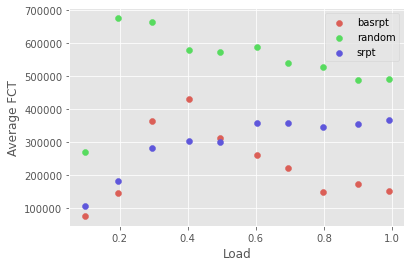

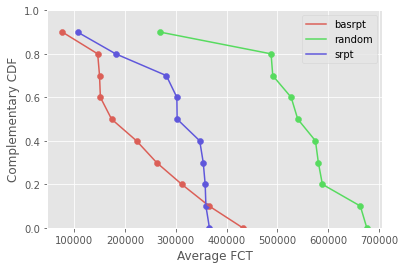

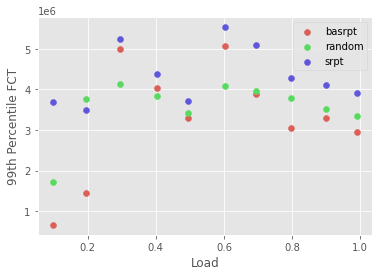

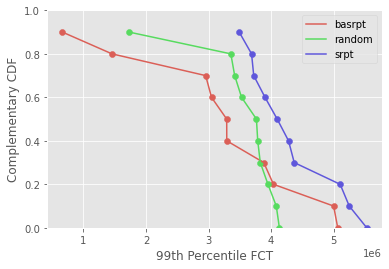

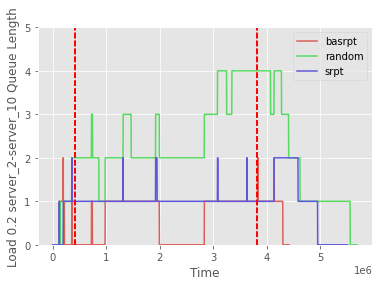

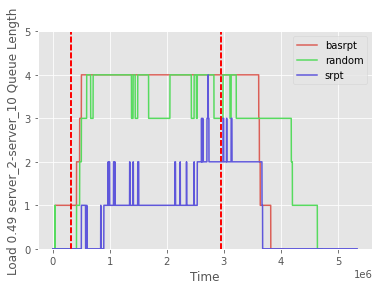

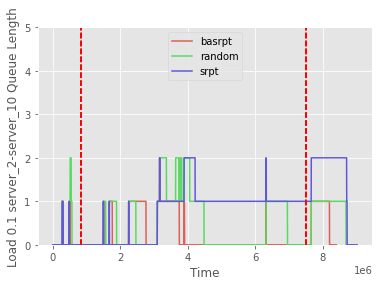

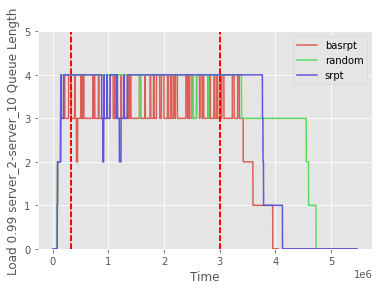

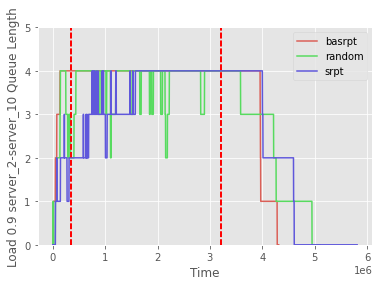

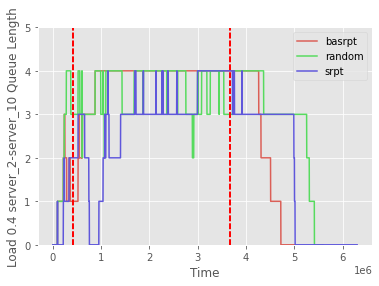

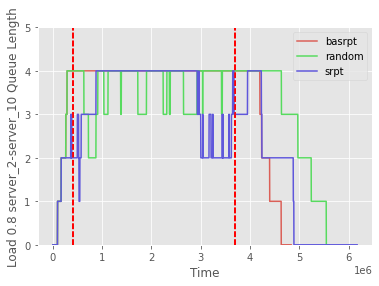

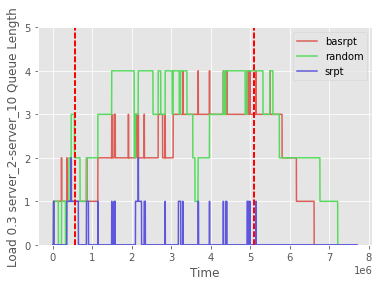

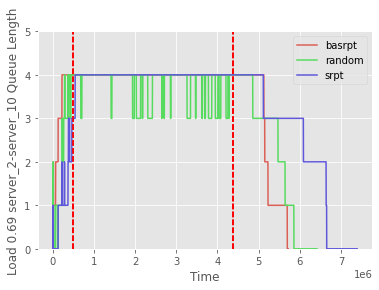

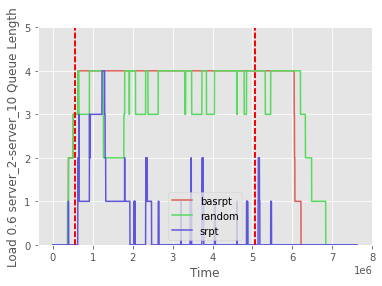

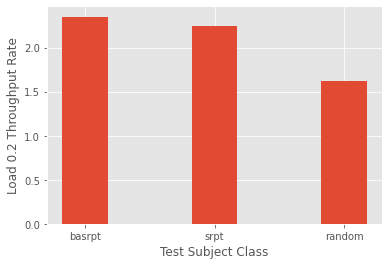

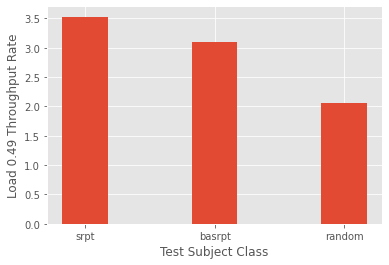

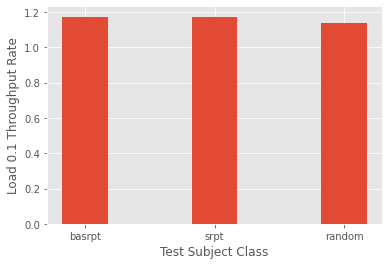

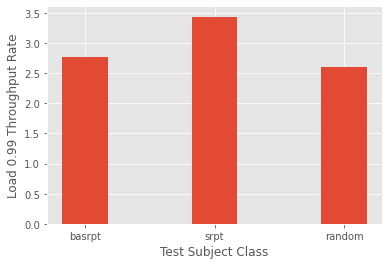

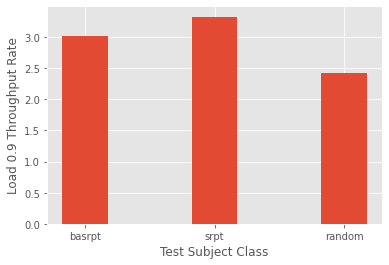

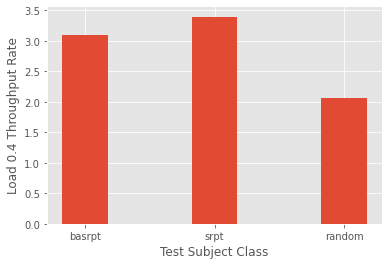

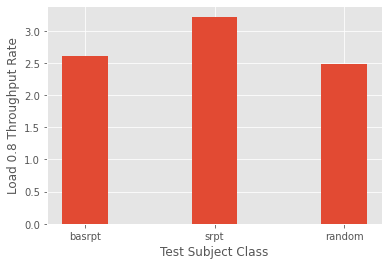

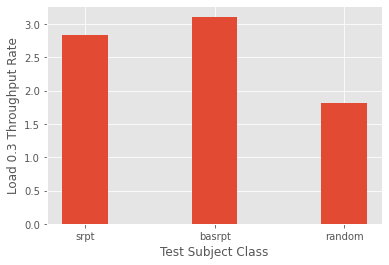

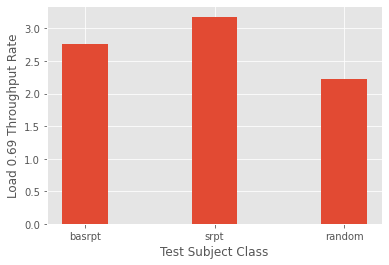

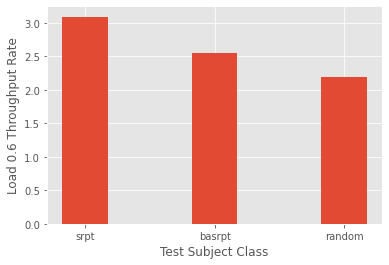

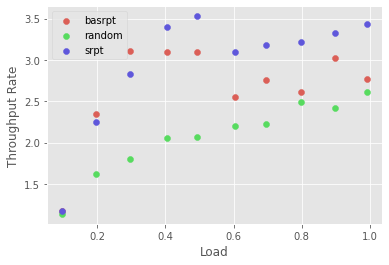

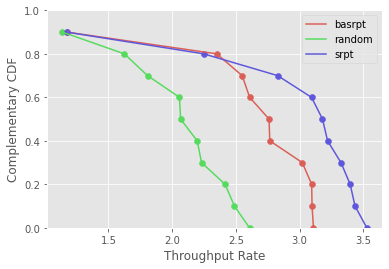

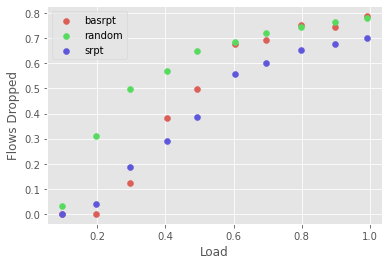

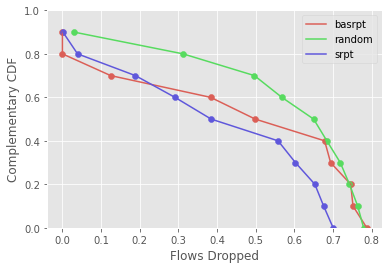

In [11]:
%autoreload
import trafpy
from trafpy.manager import EnvAnalyser, EnvsPlotter

# analyse
analysers = [EnvAnalyser(env, env.scheduler.scheduler_name) for env in envs]
for analyser in analysers:
    analyser.compute_metrics(measurement_start_time='auto',
                             measurement_end_time='auto',
                             print_summary=True)
# plot
plotter = EnvsPlotter()
_ = plotter.plot_average_fct_vs_load(*analysers)
_ = plotter.plot_99th_percentile_fct_vs_load(*analysers)
_ = plotter.plot_src_dst_queue_evolution_for_different_loads('server_2', 'server_10', 'queue_lengths_num_flows', *analysers)
# _ = plotter.plot_src_dst_queue_evolution_for_different_loads('server_2', 'server_10', 'queue_lengths_info_units', *analysers)
_ = plotter.plot_throughput_vs_load(*analysers)
_ = plotter.plot_fraction_of_arrived_flows_dropped_vs_load(*analysers)